# Interoperability in Julia
The `Interoperability` notebook is a collection of examples of how to use Julia to interact with other languages.

**Content of the notebook:**
* [Julia and Python](#julia-and-python)
* [Julia and R, RCall](#julia-and-r)

## Julia and Python <a id='julia-and-python'></a>

In [3]:
# using Pkg; Pkg.add("PyCall")
using PyCall

In [5]:
py"print('Hello World from Python!')"

Hello World from Python!


In [8]:
# In python we use ** instead of ^ for powers
py_var = py"2**3"
jl_var = 2^3

py_var == jl_var

true

In [14]:
# Import modules
math = pyimport("math")

x = -2π:0.01:2π # Julia array
y = math.sin.(x) # Sin(x) using math python module

typeof(y) # Julia array

Vector{Float64} (alias for Array{Float64, 1})

In [16]:
plt = pyimport("matplotlib.pyplot")

plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")
plt.show() # This wil open a new window, clearly not optimal 

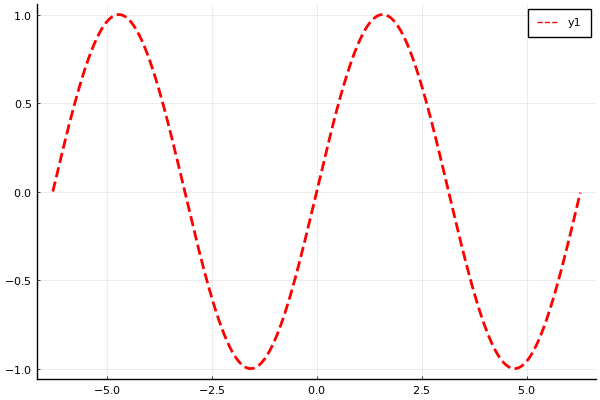

In [29]:
# If we want to use python pyplot to plot we can use the version that 
# is implemented in Julia
# using Pkg; Pkg.add("PyPlot")
using Plots
pyplot()

plot(x,y, color="red", linewidth=2.0, linestyle=:dash)

In [38]:
# We can use String interpolation to pass variables to python
f(x) = py"$x**8"

f (generic function with 1 method)

In [39]:
f(3)

6561

In [51]:
# Load sklearn's Boston housing price dataset from Python to Julia
using DataFrames

sk_datasets = pyimport("sklearn.datasets")
boston = sk_datasets.load_boston()

df = DataFrame(boston["data"], :auto) # This loads the data into a DataFrame

cols = boston["feature_names"] # This is a list of the column names

rename!(df, Symbol.(cols))   # This converts the column names to symbols

df[1:6,1:4]

,CRIM,ZN,INDUS,CHAS
,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0
2,0.02731,0.0,7.07,0.0
3,0.02729,0.0,7.07,0.0
4,0.03237,0.0,2.18,0.0
5,0.06905,0.0,2.18,0.0
6,0.02985,0.0,2.18,0.0


## Julia and R, RCall <a id='julia-and-r'></a>

In [66]:
# using Pkg; Pkg.add("RCall")
using RCall
ENV["R_HOME"] = ["/usr/bin/R"]
R"print('Hello World from R!')"

[1] "Hello World from R!"


RObject{StrSxp}
[1] "Hello World from R!"


In [30]:
r_var = R"2^3" # RCall returns RObjects 

r_var == jl_var

false

In [31]:
r_var = rcopy(r_var) # We can copy RCall objects in to Julia

r_var == jl_var

true

In [73]:
# We can use the macro @rlibrary to import R libraries
@rlibrary "ggplot2"

LoadError: REvalError: Error in loadNamespace(name) : there is no package called ‘ggplot2’
Calls: asNamespace ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart

In [72]:
R"library(ggplot2)"

LoadError: REvalError: Error in library(ggplot2) : there is no package called ‘ggplot2’